# Exploratory data analysis on SECOM dataset

In [53]:
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

secom = fetch_openml(name='UCI-SECOM-Dataset', version=1)

df = pd.DataFrame(data=secom.data, columns=secom.feature_names)

print(df.shape)

(1567, 592)


## Basic statistics and info

In [3]:
print(df.columns)

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


In [4]:
print(df.head())

                    Time        0        1          2          3       4  \
0  '2008-07-19 11:55:00'  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  '2008-07-19 12:32:00'  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  '2008-07-19 13:17:00'  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  '2008-07-19 14:43:00'  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  '2008-07-19 15:22:00'  3032.24  2502.87  2233.3667  1326.5200  1.5334   

       5         6       7       8  ...       581     582     583     584  \
0  100.0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   
1  100.0  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   
2  100.0   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   
3  100.0  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   
4  100.0  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045   

       585     586     587     588       589  Pass/Fail  
0   2.3630     NaN    

In [5]:
print(df.describe())

                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.0000

## Missing values

In [6]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100

missing_values_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_values_sorted = missing_values_df.sort_values(by='Missing Values', ascending=False)

print(missing_values_sorted)

    Feature  Missing Values  Percentage
269     292            1429   91.193363
145     157            1429   91.193363
146     158            1429   91.193363
270     293            1429   91.193363
458     492            1341   85.577537
..      ...             ...         ...
533     585               1    0.063816
534     586               1    0.063816
535     587               1    0.063816
536     588               1    0.063816
537     589               1    0.063816

[538 rows x 3 columns]


In [26]:
over_50_missing = missing_values_sorted[missing_values_sorted['Percentage'] > 50]
print(over_50_missing)

    Feature  Missing Values  Percentage
269     292            1429   91.193363
145     157            1429   91.193363
146     158            1429   91.193363
270     293            1429   91.193363
458     492            1341   85.577537
208     220            1341   85.577537
335     358            1341   85.577537
84       85            1341   85.577537
479     516            1018   64.964901
480     517            1018   64.964901
356     382            1018   64.964901
107     111            1018   64.964901
357     383            1018   64.964901
358     384            1018   64.964901
231     246            1018   64.964901
229     244            1018   64.964901
230     245            1018   64.964901
106     110            1018   64.964901
481     518            1018   64.964901
105     109            1018   64.964901
527     579             949   60.561583
529     581             949   60.561583
526     578             949   60.561583
528     580             949   60.561583


<Figure size 1200x800 with 0 Axes>

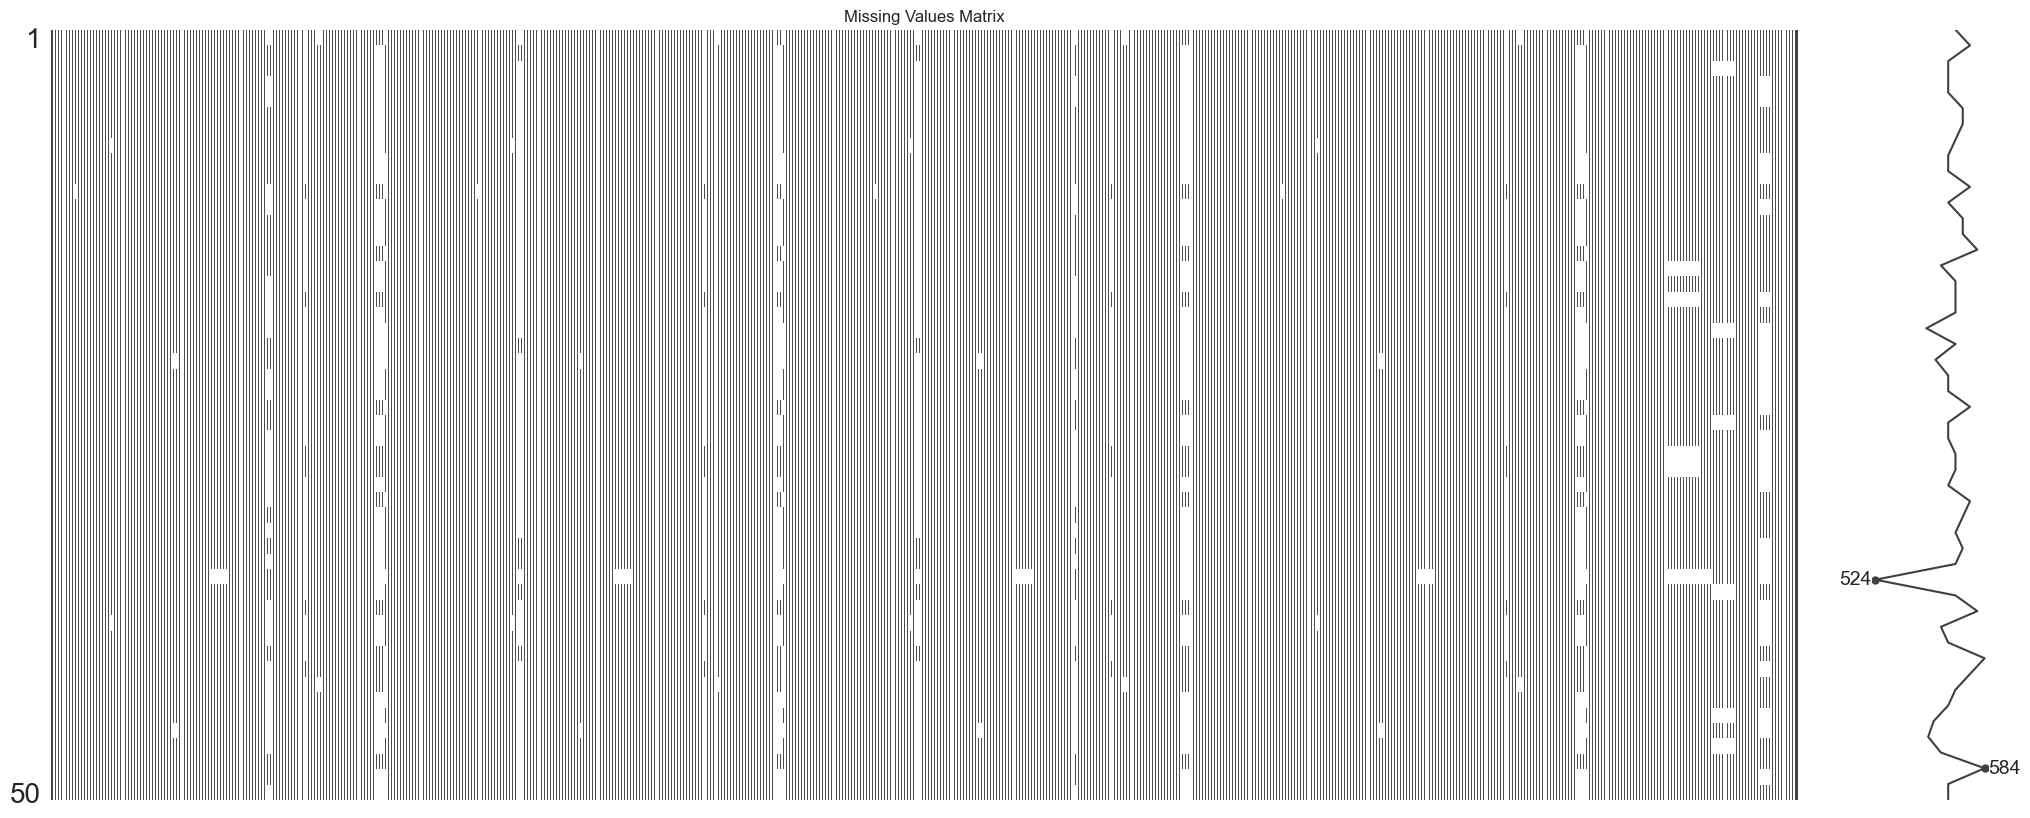

In [8]:
# Visualize missing values
plt.figure(figsize=(12, 8))
msno.matrix(df.sample(50))
plt.title('Missing Values Matrix')
plt.show()

## Class distribution

target
-1    1463
 1     104
Name: count, dtype: int64


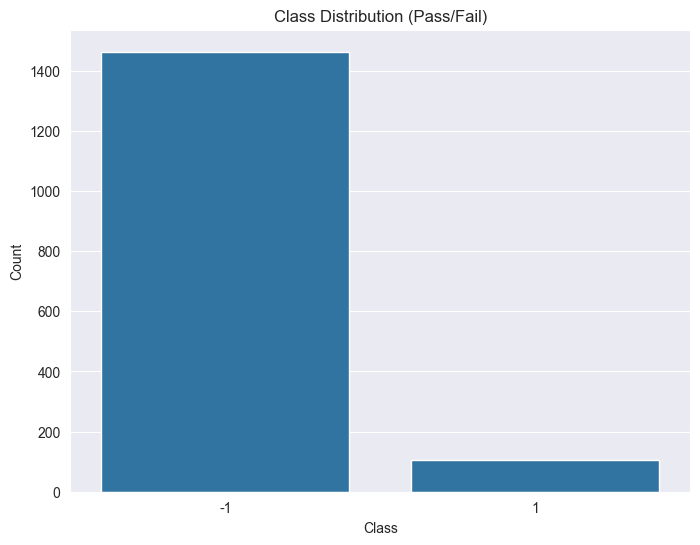

In [11]:
df.rename(columns={'Pass/Fail': 'target'}, inplace=True)

class_distribution = df['target'].value_counts()
print(class_distribution)

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution (Pass/Fail)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [44]:
# Convert the time column to datetime
df['Time'] = pd.to_datetime(df['Time'])
df['time_numeric'] = df['Time'].apply(lambda x: x.timestamp())
df.drop(columns=['Time'], inplace=True)

KeyError: 'Time'

## Correlation matrix

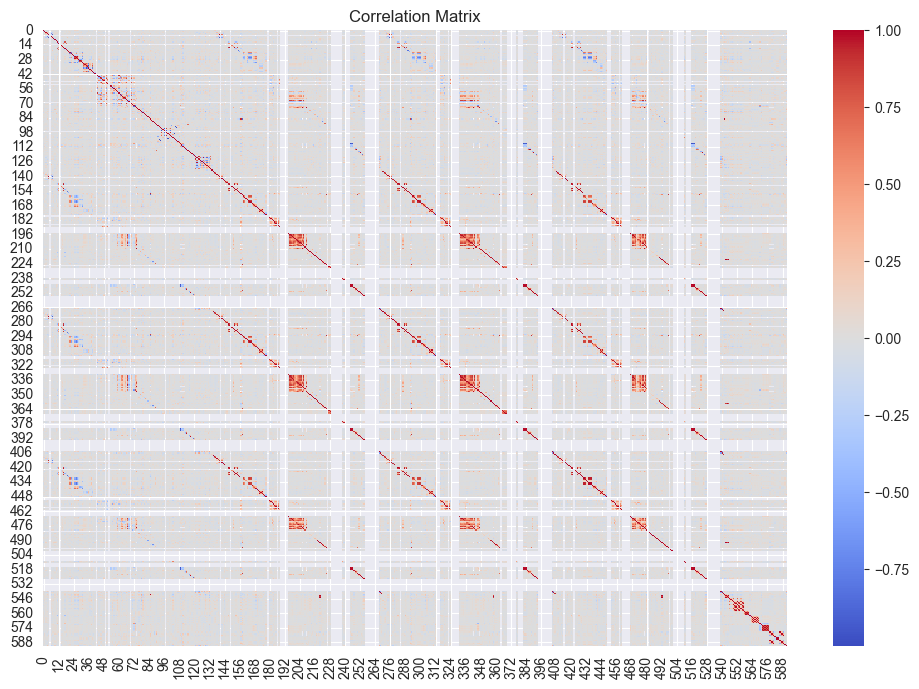

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Constant features drop

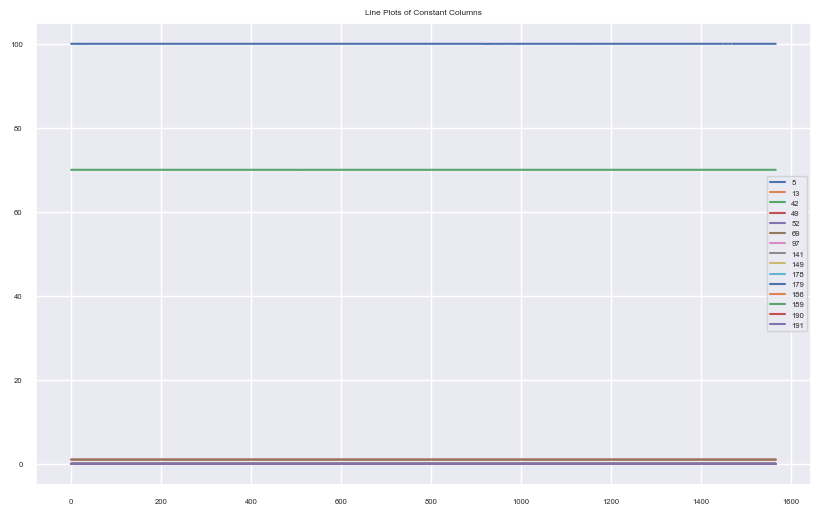

In [36]:
df_constant_col = [col for col in df.columns if df[col].std() == 0]
constant_columns = df[df_constant_col]

columns_to_plot = constant_columns.columns[0:15]

plt.figure(figsize=(10, 6))

for col in columns_to_plot:
    constant_columns[col].plot(label=col)

plt.title('Line Plots of Constant Columns')
plt.legend()

plt.show()

In [37]:
df.drop(columns = constant_columns.columns, inplace=True)

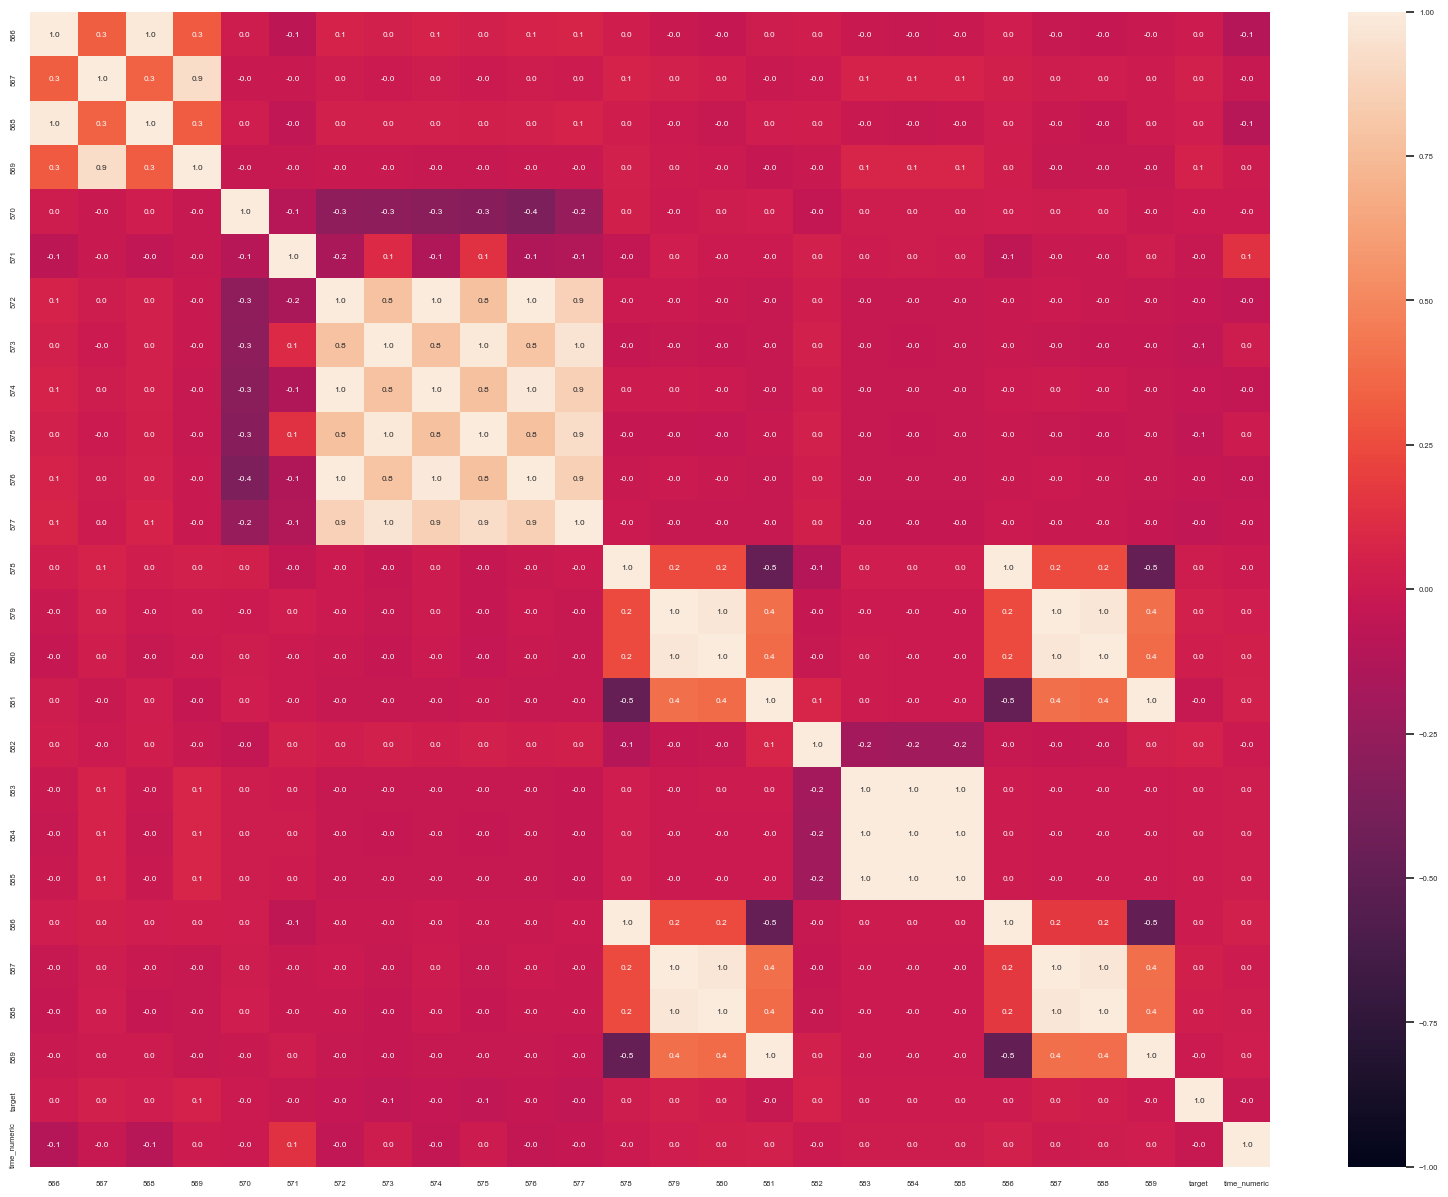

In [45]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=0.5)

sns.heatmap(df.iloc[:, 450:].corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

plt.show()

### Null features frop

In [38]:
features_to_drop = over_50_missing['Feature']
print(features_to_drop.to_list())

df_dropped = df.drop(columns=features_to_drop)

['292', '157', '158', '293', '492', '220', '358', '85', '516', '517', '382', '111', '383', '384', '246', '244', '245', '110', '518', '109', '579', '581', '578', '580', '346', '72', '73', '345']


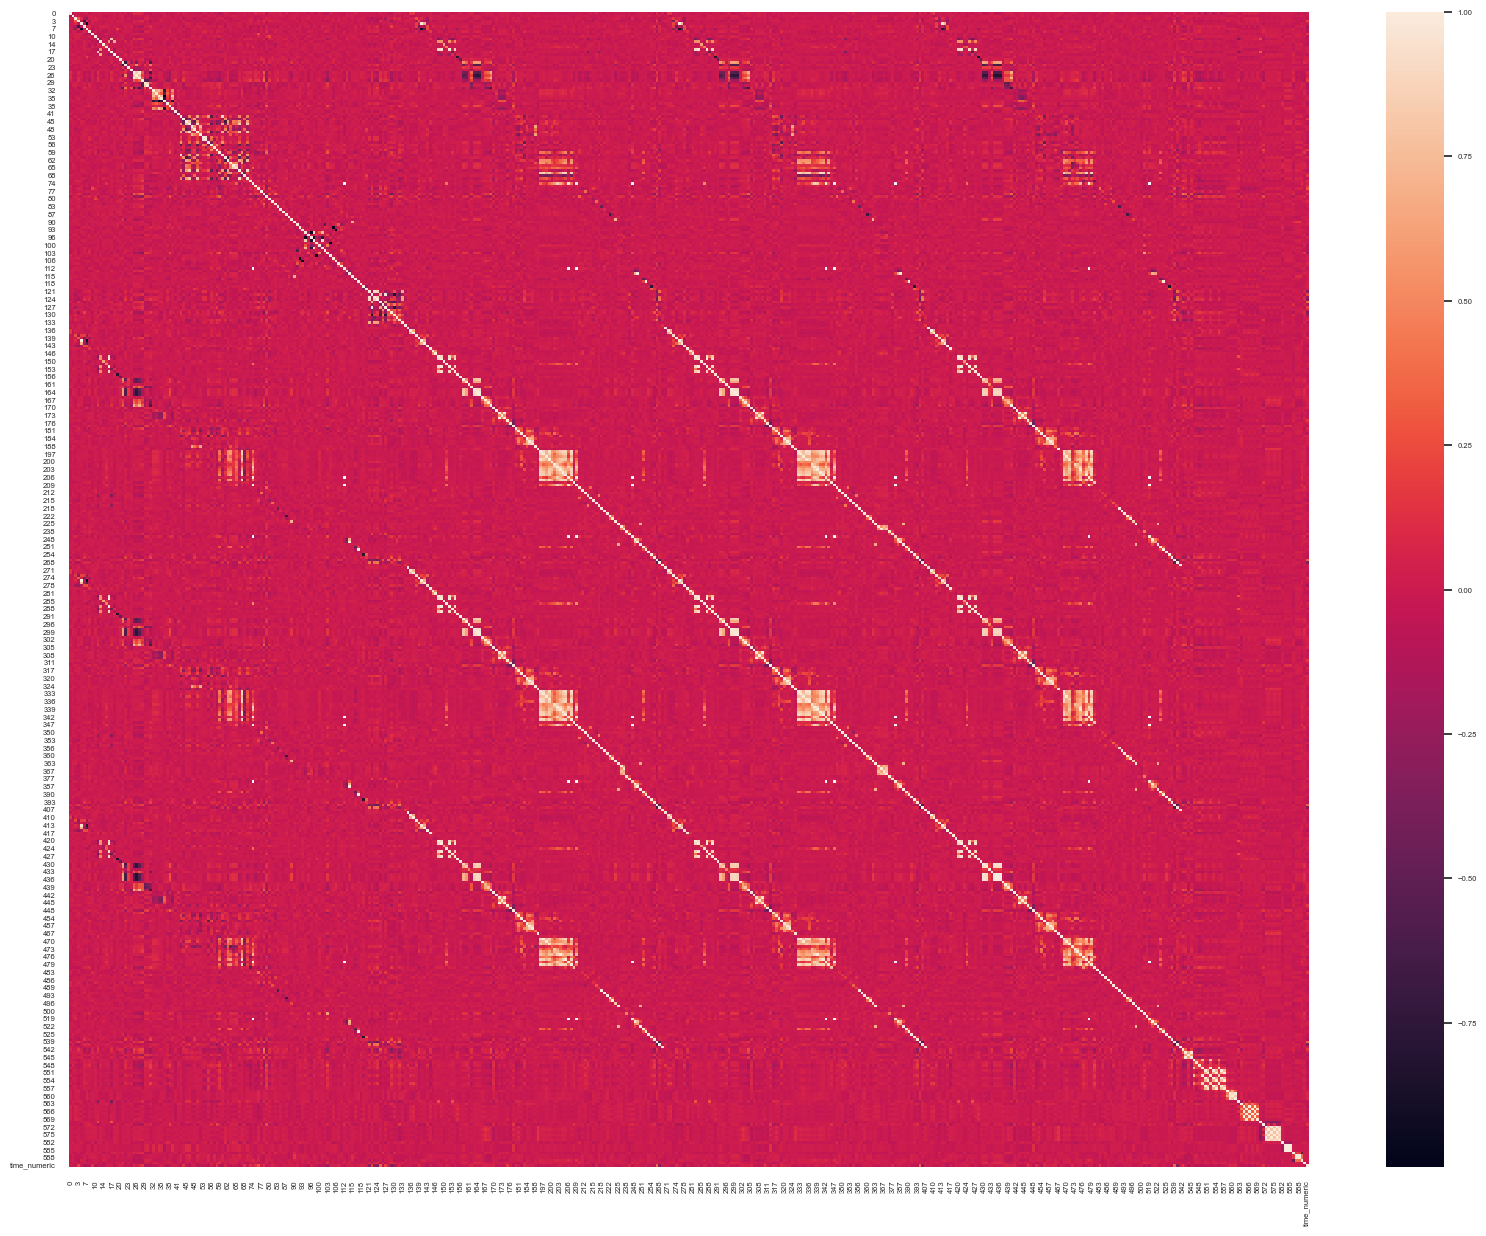

In [47]:
#Correlation Matrix after deletion of constant and null columns
plt.figure(figsize=(20, 15))

corr_matrix_dropped = df_dropped.corr()

sns.heatmap(corr_matrix_dropped)

plt.show()

### High correlation pairs of features

Num of high correlation pairs: 1190


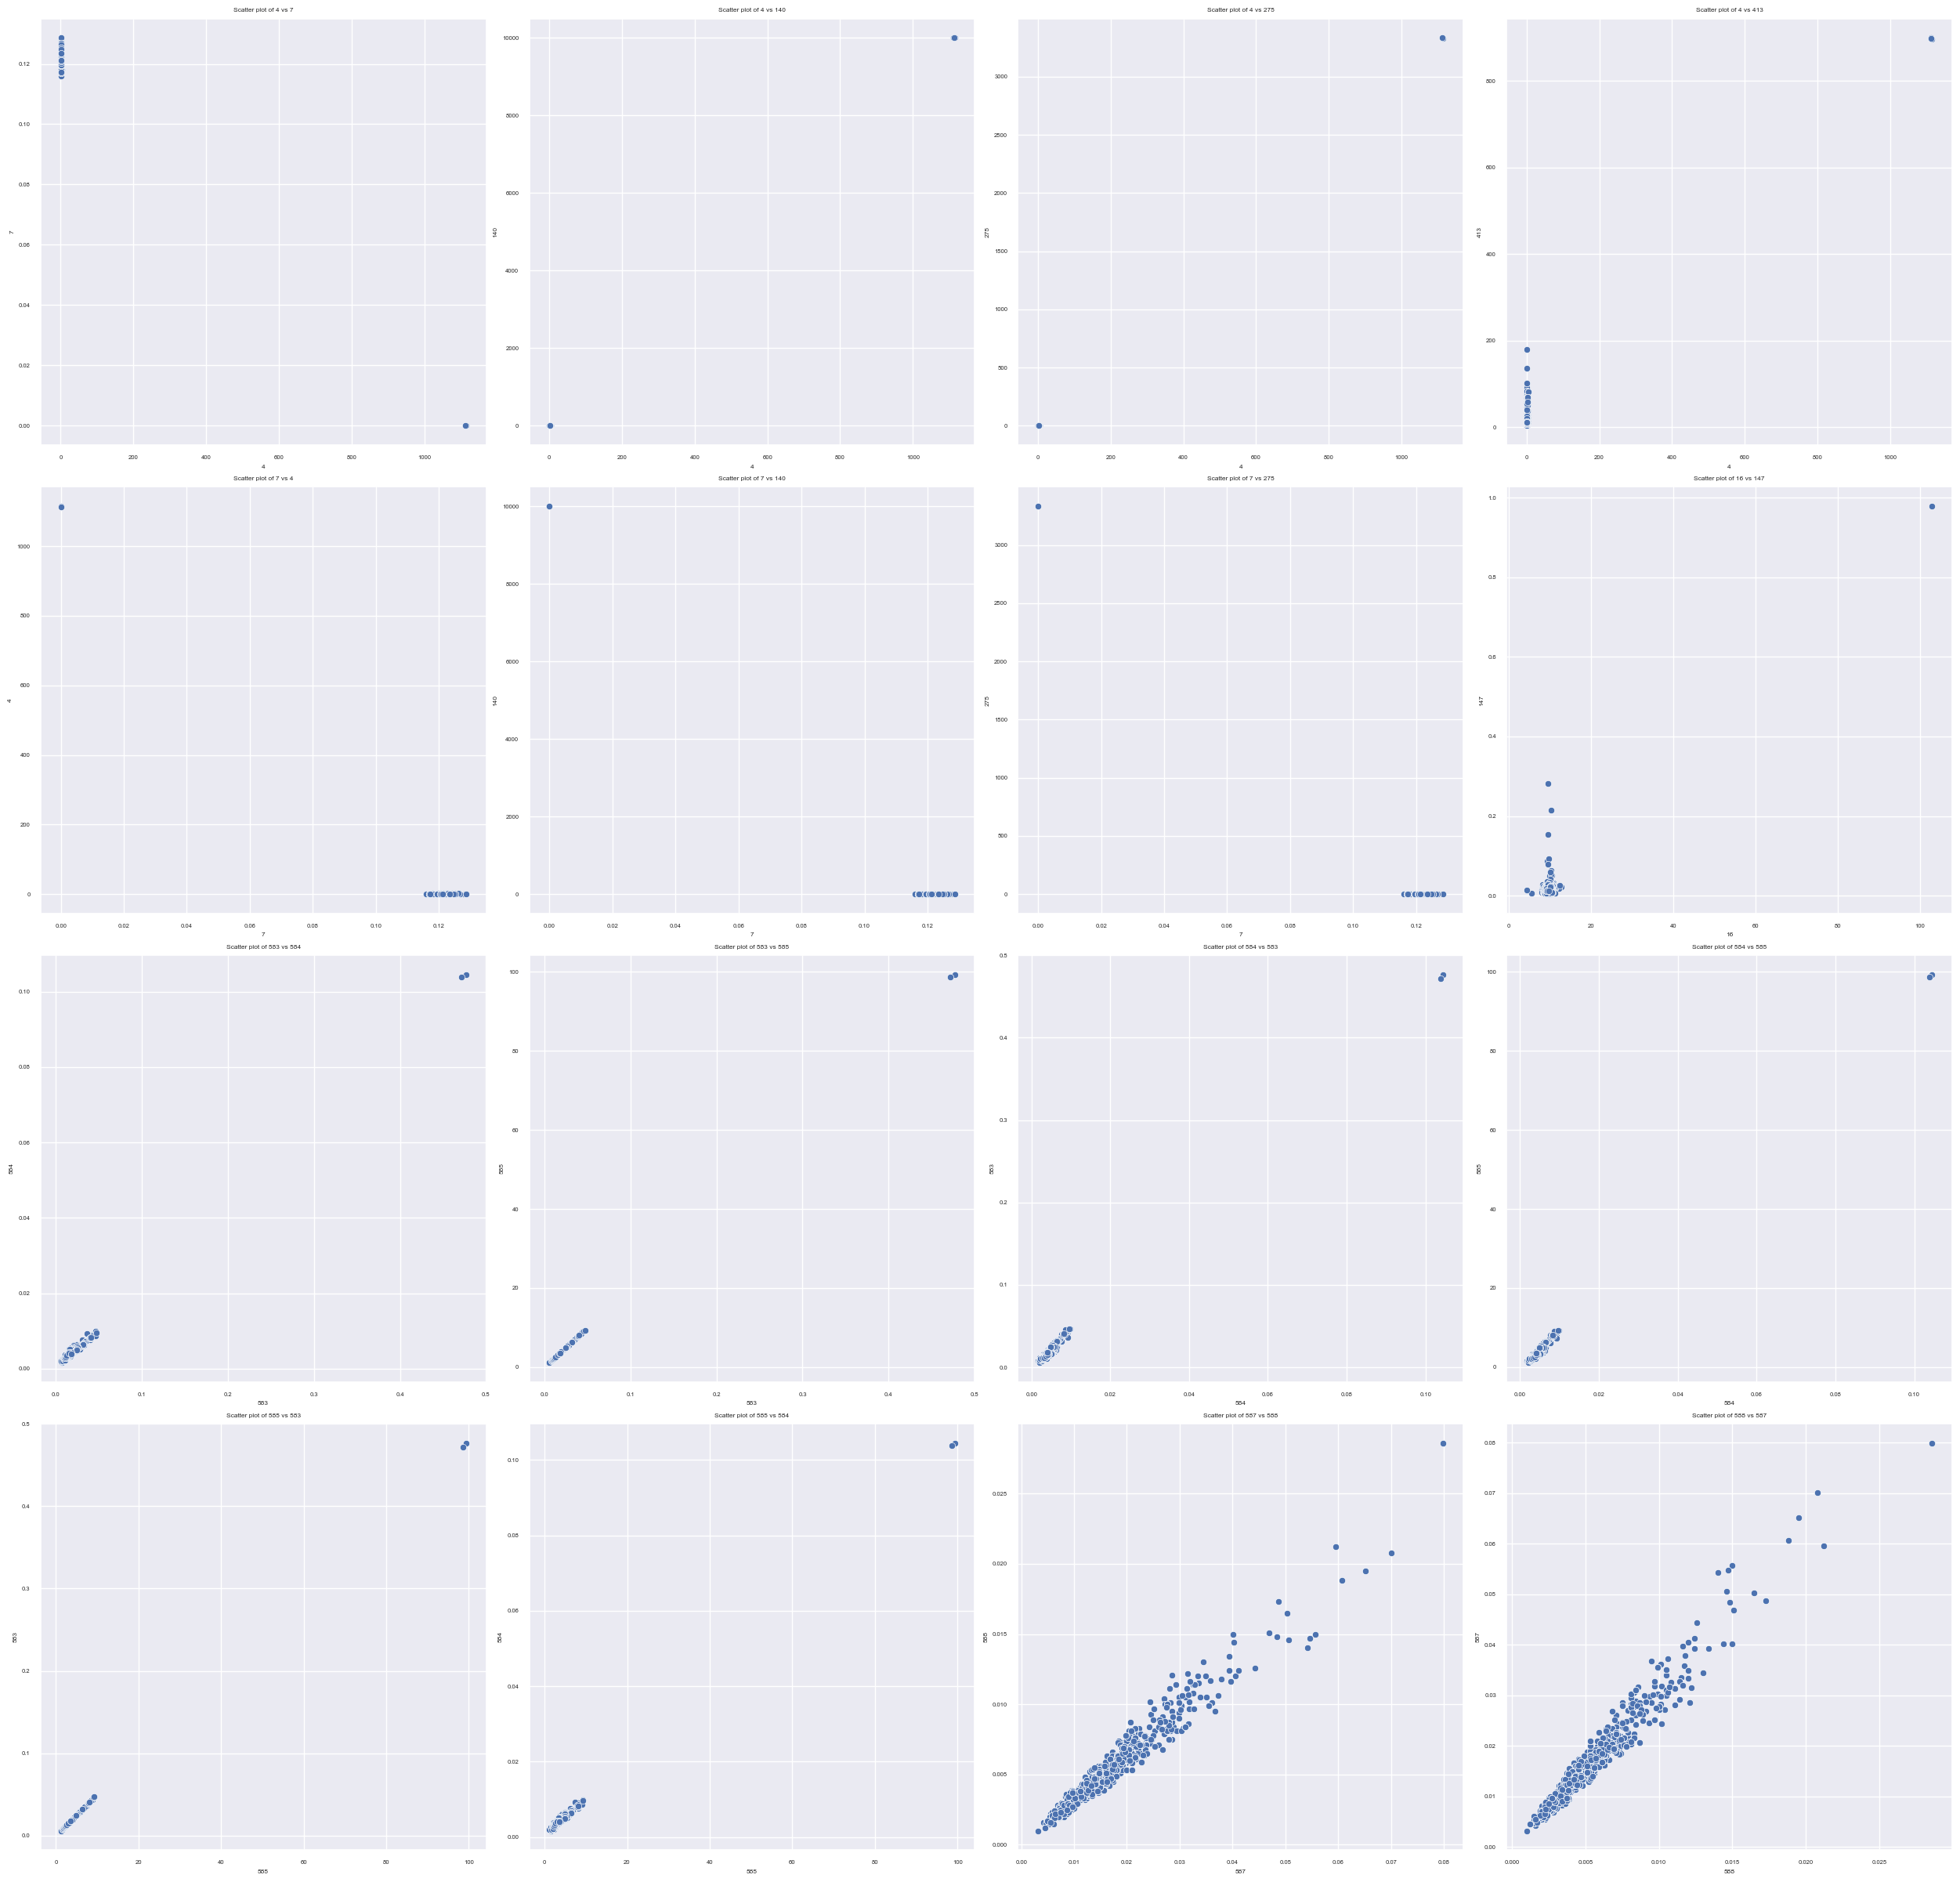

In [55]:
threshold = 0.8

high_corr_pairs = [(i, j) for i in corr_matrix_dropped.columns for j in corr_matrix_dropped.columns if i != j and abs(corr_matrix_dropped.loc[i, j]) >= threshold]

num_plots = len(high_corr_pairs)
print(f'Num of high correlation pairs: {num_plots}')

num_cols = 4
num_rows = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 6))

axes = axes.flatten()

for idx, (i, j) in enumerate(high_corr_pairs[:8] + high_corr_pairs[-8:]):
    sns.scatterplot(x=df[i], y=df[j], ax=axes[idx])
    axes[idx].set_title(f'Scatter plot of {i} vs {j}')
    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel(j)

plt.tight_layout()
plt.show()